<a href="https://colab.research.google.com/github/SaMoAAlamdari/Stock-Market-Analysis-using-Python/blob/main/StockMarketAnalysisUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis using Python

## Introduction
This project performs a detailed analysis of stock prices for companies like Google (GOOG) and Apple (AAPL) using Python. The analysis includes fetching historical stock data, calculating financial indicators, visualizing the data, performing statistical and regression analysis.


## Importing Libraries
    First, we import all the necessary libraries. Each library serves a specific purpose in our stock market analysis:

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Fetching and Preparing Stock Data

This section of the code defines a function to fetch stock data using the yfinance library, sets the date range, and retrieves the data for the selected tickers.

Next, we define the date range for the data we want to fetch. In this example, we retrieve data from the past three years

Finally, we fetch the data for the selected tickers (GOOG and AAPL) and display the first few rows to ensure the data has been retrieved correctly

In [2]:
# Function to get stock data
def get_stock_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, progress=False, group_by='ticker')
    data = data.stack(level=0, future_stack=True).rename_axis(['Date', 'Ticker']).reset_index(level=1)
    return data

# Define date range
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=3*365)).strftime("%Y-%m-%d")

# Fetch data for selected tickers
tickers = ['GOOG', 'AAPL', 'AMZN']
data = get_stock_data(tickers, start_date, end_date)
print(data.head())


Price      Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2021-12-27   AMZN  171.037003  172.942993  169.215500  169.669495  169.669495   
2021-12-27   AAPL  177.089996  180.419998  177.070007  180.330002  177.423660   
2021-12-27   GOOG  147.463501  148.426498  147.250000  148.063995  147.533890   
2021-12-28   AMZN  170.182495  172.175995  169.135498  170.660995  170.660995   
2021-12-28   AAPL  180.160004  181.330002  178.529999  179.289993  176.400421   

Price         Volume  
Date                  
2021-12-27  58688000  
2021-12-27  74919600  
2021-12-27  13256000  
2021-12-28  54638000  
2021-12-28  79144300  


## Calculating Financial Indicators

This part of the code defines functions to calculate important financial indicators like the Relative Strength Index (RSI) and Bollinger Bands. These indicators help in analyzing the stock's performance and identifying trends.

Bollinger Bands
Bollinger Bands consist of a middle band (usually a 20-day Simple Moving Average), an upper band (SMA + 2 standard deviations), and a lower band (SMA - 2 standard deviations). They are used to measure market volatility.

Next, we calculate these indicators for each ticker and concatenate the resulting dataframes back together

In [3]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_bollinger_bands(data, window=20):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return sma, upper_band, lower_band

# Calculate indicators for each ticker
indicators = []
for ticker in tickers:
    df = data[data['Ticker'] == ticker].copy()
    df['RSI'] = calculate_rsi(df)
    df['SMA'], df['Upper Band'], df['Lower Band'] = calculate_bollinger_bands(df)
    indicators.append(df)

# Concatenate dataframes back together
data = pd.concat(indicators)
print(data.tail())


Price      Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2024-12-16   AMZN  230.229996  233.000000  228.009995  232.929993  232.929993   
2024-12-17   AMZN  232.389999  232.729996  227.850006  231.149994  231.149994   
2024-12-18   AMZN  230.770004  231.399994  220.110001  220.520004  220.520004   
2024-12-19   AMZN  224.910004  226.089996  222.919998  223.289993  223.289993   
2024-12-20   AMZN  219.839996  226.210007  218.729996  224.919998  224.919998   

Price         Volume        RSI         SMA  Upper Band  Lower Band  
Date                                                                 
2024-12-16  37552100  84.746153  214.413500  238.372054  190.454947  
2024-12-17  35948100  78.632913  215.886000  240.172320  191.599680  
2024-12-18  43281400  65.026444  216.681500  240.449412  192.913589  
2024-12-19  39918700  65.461855  217.702000  240.715507  194.688492  
2024-12-20  

## Visualizing Stock Data

This section of the code creates interactive visualizations for each ticker using the plotly library. We use candlestick charts and line plots to display various financial indicators, all within a multi-plot layout.

Adding Plots for Each Ticker

For each ticker, we create and add several plots, including candlestick charts and line plots for Bollinger Bands and RSI.

Customizing Axes and Layout

We update the x-axis and y-axis for each subplot and customize the layout to enhance readability and presentation.

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=len(tickers), cols=1, shared_xaxes=True,
                    subplot_titles=tickers, vertical_spacing=0.1)

# Add plots for each ticker
for i, ticker in enumerate(tickers):
    df = data[data['Ticker'] == ticker]

    fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'],
                                 low=df['Low'], close=df['Close'], name=f'{ticker} Candlestick'),
                  row=i+1, col=1)

    fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], line=dict(color='rgba(255, 0, 0, 0.5)'), name=f'{ticker} Upper Band'),
                  row=i+1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA'], line=dict(color='rgba(0, 0, 255, 0.5)'), name=f'{ticker} SMA'),
                  row=i+1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], line=dict(color='rgba(0, 255, 0, 0.5)'), name=f'{ticker} Lower Band'),
                  row=i+1, col=1)

    fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='rgba(128, 0, 128, 0.5)'), name=f'{ticker} RSI', yaxis='y2'),
                  row=i+1, col=1)

    # Update x-axis and y-axis for each subplot
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=False),
        title_text = 'Date',
        row=i+1, col=1
    )

    fig.update_yaxes(title_text=f'{ticker} Price', row=i+1, col=1)

# Update layout
fig.update_layout(height=800, width=1200, title="Stock Market Analysis Dashboard")

fig.show()


## Adding Bar Plots for Each Ticker
This section of the code creates bar plots for the closing prices of each ticker and adds them to the existing subplot layout. We use plotly.express to create the bar plots and then add them to the fig object, which contains the multi-plot layout

Adding Bar Plots
For each ticker, we create a bar plot of the closing prices using plotly.express and add the plot to the subplot layout. We also customize the x-axis and y-axis titles for each subplot to enhance readability.

Customizing the Layout
Finally, we update the layout of the entire figure to ensure it looks well-organized and clear.

In [5]:
# Create subplots
fig = make_subplots(rows=len(tickers), cols=1, shared_xaxes=True,
                    subplot_titles=tickers, vertical_spacing=0.1)

# Add bar plots for each ticker
for i, ticker in enumerate(tickers):
    df = data[data['Ticker'] == ticker]

    # Create bar plot for closing prices
    bar_fig = px.bar(df, x=df.index, y='Close')
    for trace in bar_fig.data:
        fig.add_trace(trace, row=i+1, col=1)

    # Update x-axis and y-axis for each subplot
    fig.update_xaxes(
        title_text=f'{ticker} Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=False),
        row=i+1, col=1
    )
    fig.update_yaxes(title_text=f'{ticker} Price', row=i+1, col=1)

# Update layout
fig.update_layout(height=800, width=1200, title="Stock Market Analysis Dashboard")

fig.show()


## Adding Scatter Plots for Each Ticker
This section of the code creates scatter plots for the closing prices of each ticker, with weekends hidden, and adds them to the existing subplot layout. We use plotly.express to create the scatter plots and then add them to the fig object, which contains the multi-plot layout.

Adding Scatter Plots
For each ticker, we create a scatter plot of the closing prices using plotly.express and add the plot to the subplot layout. We also update the x-axis to hide weekends and customize the x-axis and y-axis titles for each subplot to enhance readability.

Customizing the Layout
Finally, we update the layout of the entire figure to ensure it looks well-organized and clear.

In [6]:

# Create subplots
fig = make_subplots(rows=len(tickers), cols=1, shared_xaxes=True,
                    subplot_titles=tickers, vertical_spacing=0.1)

# Add scatter plots for each ticker and hide weekends
for i, ticker in enumerate(tickers):
    df = data[data['Ticker'] == ticker]

    # Create scatter plot for closing prices and hide weekends
    scatter_fig = px.scatter(df, x=df.index, y='Close', title=f'{ticker} Stock Analysis by Hiding Weekend Gaps')
    scatter_fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "sun"])  # Hide weekends
        ]
    )

    # Add scatter plot traces to the subplot
    for trace in scatter_fig.data:
        fig.add_trace(trace, row=i+1, col=1)

    # Update x-axis and y-axis for each subplot
    fig.update_xaxes(
        title_text=f'{ticker} Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=False),
        row=i+1, col=1
    )
    fig.update_yaxes(title_text=f'{ticker} Price', row=i+1, col=1)

# Update layout
fig.update_layout(height=800, width=1200, title="Stock Market Analysis Dashboard")

fig.show()


## Calculating the Correlation Matrix

This section of the code calculates the correlation matrix for the closing prices of the stocks. A correlation matrix helps to understand the relationship between different stocks, indicating how they move in relation to each other.

In [7]:
# Calculate the correlation matrix for closing prices
closing_prices = data.pivot_table(index='Date', columns='Ticker', values='Close')
correlation_matrix = closing_prices.corr()
print(correlation_matrix)

Ticker      AAPL      AMZN      GOOG
Ticker                              
AAPL    1.000000  0.831752  0.865987
AMZN    0.831752  1.000000  0.950399
GOOG    0.865987  0.950399  1.000000


## Visualizing the Correlation Matrix

This section of the code visualizes the correlation matrix using a heatmap. A heatmap is an excellent way to represent the correlation values in a visually intuitive manner, allowing for quick identification of strong and weak correlations.

In [8]:
# Visualize the correlation matrix using a heatmap
heatmap = px.imshow(correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    color_continuous_scale='RdBu_r',
                    title="Stock Price Correlation Matrix")

heatmap.update_layout(xaxis_title="Stocks", yaxis_title="Stocks")
heatmap.show()


## Summary Statistics and Regression Analysis

  This section of the code performs summary statistics and linear regression analysis to understand the relationship between Google (GOOG) and Apple (AAPL) stock prices. It also plots the regression line with different colors for each stock.


## Linear Regression Analysis
  We perform a linear regression analysis to understand the relationship between the closing prices of GOOG and AAPL.

  Prepare Data: We reshape the data for GOOG and AAPL closing prices.

  Fit Model: We fit a linear regression model to the data.

  Print Coefficients: We print the intercept and coefficient of the regression model.

  Predict Values: We predict AAPL closing prices using the fitted model.

  Plot Regression Line: We plot the actual closing prices of GOOG and AAPL and the regression line.

By performing these analyses, we gain a deeper understanding of the statistical properties and relationships between the stock prices of Google and Apple.

Summary Statistics:
 Ticker        AAPL        AMZN        GOOG
count   752.000000  752.000000  752.000000
mean    177.634056  143.643253  133.018533
std      28.310262   34.555554   27.209364
min     125.019997   81.820000   83.489998
25%     155.932507  115.007502  110.696625
50%     173.615005  140.187996  132.239250
75%     191.252502  174.592503  151.940002
max     254.490005  232.929993  198.160004
Intercept: 57.781031212478865
Coefficient: 0.9010250053038694


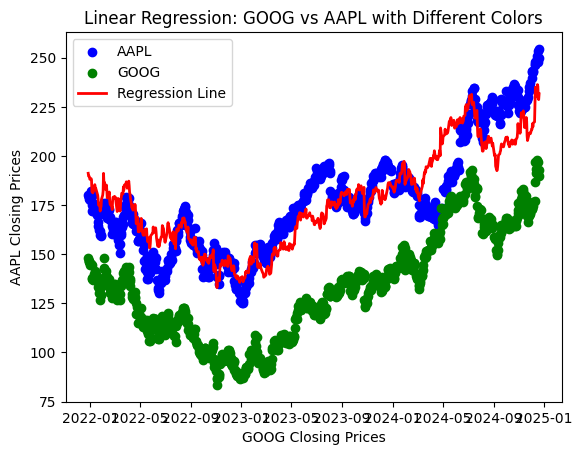

In [9]:
# Summary Statistics
summary_stats = closing_prices.describe()
print("Summary Statistics:\n", summary_stats)

# Linear Regression: GOOG vs AAPL
X = closing_prices['GOOG'].values.reshape(-1, 1)
y = closing_prices['AAPL'].values

model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predicted values
y_pred = model.predict(X)


# Plotting the regression line with different colors
plt.scatter(df.index, closing_prices['AAPL'], color='blue', label='AAPL')
plt.scatter(df.index, closing_prices['GOOG'], color='green', label='GOOG')
plt.plot(df.index, y_pred, color='red', linewidth=2, label='Regression Line')




plt.title("Linear Regression: GOOG vs AAPL with Different Colors")
plt.xlabel("GOOG Closing Prices")
plt.ylabel("AAPL Closing Prices")
plt.legend()
plt.show()


Intercept: 59.02951406714017
Coefficients: [0.81190873 0.07383315]


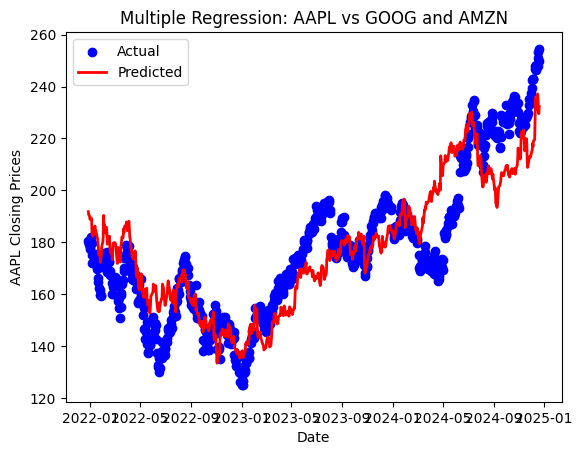

In [10]:
# Multiple Regression: AAPL vs GOOG and AMZN

X = closing_prices[['GOOG', 'AMZN']]
y = closing_prices['AAPL']

model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Predicted values
y_pred = model.predict(X)

# Plotting the results
plt.scatter(closing_prices.index, closing_prices['AAPL'], color='blue', label='Actual')
plt.plot(closing_prices.index, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Multiple Regression: AAPL vs GOOG and AMZN")
plt.xlabel("Date")
plt.ylabel("AAPL Closing Prices")
plt.legend()
plt.show()
